In [523]:
import torch
import torchvision 
from PIL import Image
import torchvision.transforms as transforms
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np
import cv2
from cv2 import resize,merge,split

In [513]:
colors = torch.tensor([[0,0,128],[0,0,64],[0,0,32],[0,128,0],[0,64,0],[0,32,0],[0,16,0],[0,8,0],[0,4,0],[0,2,0],
                      [0,1,0],[128,0,0],[64,0,0],[32,0,0],[16,0,0],[8,0,0],[4,0,0],[1,0,0]])
colormap = torch.tensor([
        [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
        [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
        [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
        [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
        [6, 51, 255], [235, 12, 255]
])

In [373]:
img = Image.open('./gtFine/test/VWI10001 2020-02-02-08-04-50_labelIds.png')
img = cv2.imread('./gtFine/test/VWI10001 2020-02-02-08-04-50_labelIds.png')
real = Image.open('./leftImg8bit/test/VWI10001 2020-02-02-08-04-50.png')

# img_transform = transforms.Compose([
#                     transforms.ToTensor(),
# ])

# img = img_transform(img)

In [340]:
class ConvertMaskColors:
    """Convert Mask colors to reflect the pretrained data colors"""

    def __init__(self,):
        pass

    def __call__(self,img):
        pass

class TopLeftCornerErase:
    def __init__(self, n_pixels: int):
        self.n_pixels = n_pixels
    
    def __call__(self, img: torch.Tensor) -> torch.Tensor:
        all_pixels = img.reshape(4, -1).transpose(1, 0)
        idx = torch.randint(len(all_pixels), (1,))[0]
        random_pixel = all_pixels[idx][:, None, None]
        return F.erase(img, 0, 0, self.n_pixels, self.n_pixels, random_pixel)

In [306]:
erase = transforms.Compose([
    TopLeftCornerErase(100)
    # reverse_preprocess,
])


trans = transforms.Compose([
                    transforms.ToPILImage(),
])

In [204]:
cls = img.unique()
# res = torch.stack([torch.where(img==cls_val, torch.tensor(1), torch.tensor(0)) for cls_val in cls])
res = [torch.where(img==cls_val, torch.tensor(1), torch.tensor(0)) for cls_val in cls]
res = torch.stack(res)


In [511]:
img = cv2.imread('./gtFine/test/VWI10001 2020-02-02-08-04-50_labelIds.png')

In [512]:
b,g,r = cv2.split(img)
shape = b.shape
b = b.reshape(-1)
g = g.reshape(-1)
r = r.reshape(-1)

In [514]:
color_b = {}
color_g = {}
color_r = {}
colors = colors.numpy()
colormap = colormap.numpy()
for i,color in enumerate(colors):
#     print(colors[i])
    color_b[colors[i][0]] = colormap[i][0].item()
    color_g[colors[i][1]] = colormap[i][1].item()
    color_r[colors[i][2]] = colormap[i][2].item()

colormap

In [515]:
for i in color_b:
    b = np.where(b == i, color_b[i], b)

for i in color_g:
    g = np.where(g == i, color_g[i], g)

for i in color_r:
    r = np.where(r == i, color_r[i], r)

In [516]:
b = b.reshape(shape)
g = g.reshape(shape)
r = r.reshape(shape)

In [517]:
new_img = cv2.merge((b,g,r))

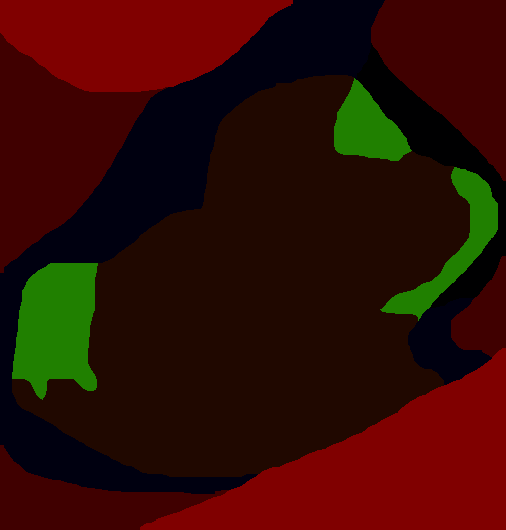

In [478]:
trans(img)

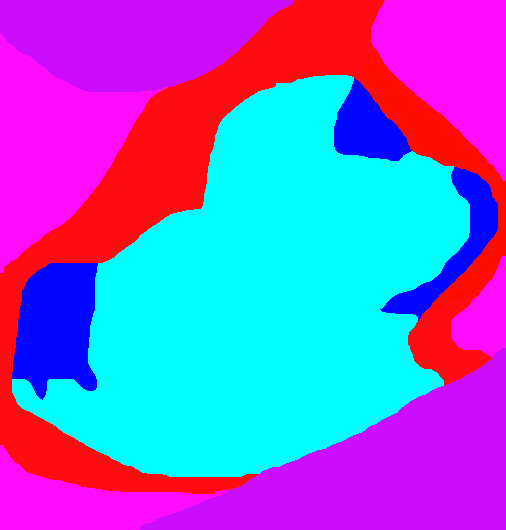

In [518]:
trans(new_img)

In [519]:
class ConvertMaskColors:
    """Convert Mask colors to reflect the pretrained data colors"""

    def __init__(self,):
        self.colors = torch.tensor([[0,0,128],[0,0,64],[0,0,32],[0,128,0],[0,64,0],[0,32,0],[0,16,0],[0,8,0],[0,4,0],[0,2,0],
                      [0,1,0],[128,0,0],[64,0,0],[32,0,0],[16,0,0],[8,0,0],[4,0,0],[1,0,0]])
        self.colormap = torch.tensor([
        [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
        [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
        [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
        [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
        [6, 51, 255], [235, 12, 255]
        ])

    
    def __call__(self,image):
        '''
            - split the image into BGR channels
            - map each channel color to the colormap
            - merge the BGR channels together
        '''
        b,g,r = split(image)
        shape = b.shape
        b = b.reshape(-1) 
        g = g.reshape(-1)
        r = r.reshape(-1)
        color_b = {}
        color_g = {}
        color_r = {}
        colors = self.colors.numpy()
        colormap = self.colormap.numpy()
        for i,color in enumerate(colors):
            color_b[colors[i][0]] = colormap[i][0].item()
            color_g[colors[i][1]] = colormap[i][1].item()
            color_r[colors[i][2]] = colormap[i][2].item()
        for i in color_b:
            b = np.where(b == i, color_b[i], b)

        for i in color_g:
            g = np.where(g == i, color_g[i], g)

        for i in color_r:
            r = np.where(r == i, color_r[i], r)
        b = b.reshape(shape)
        g = g.reshape(shape)
        r = r.reshape(shape)
        masked_img = merge((b,g,r))
        return masked_img

In [521]:
maskColors = transforms.Compose([
    ConvertMaskColors()
])



In [526]:
type(maskColors(img))

numpy.ndarray

In [525]:
type(img)

numpy.ndarray